In [6]:
# Import necessary libraries
import numpy as np  # For numerical operations, particularly with arrays
npNaN = np.nan  # Assign NumPy's NaN (Not a Number) to a variable for easier access

import matplotlib.pyplot as plt  # For data visualization
import pandas as pd  # For data manipulation and analysis
import yfinance as yf  # For accessing financial data from Yahoo Finance
import pandas_ta as ta  # For technical analysis indicators

# Download financial data
data = yf.download(tickers='^RUI', start='2012-01-01', end='2024-09-20')
# - 'tickers': Specifies the ticker symbol for the Russell 1000 Index.
# - 'start' and 'end': Defines the date range for the data download.

# Display the first 10 rows of the data
data.head(10)  # Shows the first 10 entries of the downloaded dataset.

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,697.020020,708.349976,697.020020,703.750000,703.750000,0
2012-01-04,702.700012,704.590027,698.659973,703.719971,703.719971,0
2012-01-05,702.820007,707.320007,696.969971,706.239990,706.239990,0
2012-01-06,706.239990,707.080017,702.119995,704.739990,704.739990,0
2012-01-09,705.830017,707.260010,703.000000,706.539978,706.539978,0
2012-01-10,707.950012,715.239990,707.950012,713.090027,713.090027,0
2012-01-11,712.020020,714.400024,709.669983,713.690002,713.690002,0
2012-01-12,714.479980,716.140015,709.909973,715.530029,715.530029,0
2012-01-13,712.919983,712.919983,705.570007,711.880005,711.880005,0


In [7]:
# Adding technical indicators to the dataset
data['RSI'] = ta.rsi(data.Close, length=15)  # Calculate the Relative Strength Index (RSI) over 15 periods
data['EMAF'] = ta.ema(data.Close, length=20)  # Calculate the Exponential Moving Average (EMA) for 20 periods
data['EMAM'] = ta.ema(data.Close, length=100)  # Calculate the EMA for 100 periods
data['EMAS'] = ta.ema(data.Close, length=150)  # Calculate the EMA for 150 periods

# Create a target variable based on the difference between adjusted close and open prices
data['Target'] = data['Adj Close'] - data.Open  # Calculate the difference
data['Target'] = data['Target'].shift(-1)  # Shift the target variable to align with the next day's data

# Classify the target variable into binary classes (1 or 0) based on whether the target is positive
data['TargetClass'] = [1 if data.Target[i] > 0 else 0 for i in range(len(data))]

# Create a new column for the next day's adjusted close price
data['TargetNextClose'] = data['Adj Close'].shift(-1)  # Shift adjusted close to align with the next day

# Clean the dataset
data.dropna(inplace=True)  # Remove rows with any NaN values
data.reset_index(inplace=True)  # Reset the index after dropping rows
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)  # Drop unnecessary columns



/tmp/ipykernel_6843/878663475.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i] > 0 else 0 for i in range(len(data))]


In [8]:
# Select the first 11 columns from the DataFrame and create a new dataset
data_set = data.iloc[:, 0:11]  # Use iloc to slice the DataFrame for columns 0 to 10

# Set Pandas options to display all columns in the output
pd.set_option('display.max_columns', None)

# Display the first 20 rows of the new dataset
data_set.head(20)

# Uncomment below lines to print additional information about the dataset
#print(data_set.shape)  # Print the shape (rows, columns) of the new dataset
#print(data.shape)      # Print the shape of the original dataset
#print(type(data_set))  # Print the type of the new dataset


,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,765.539978,769.619995,765.539978,766.760010,60.351366,752.297087,745.854375,746.777001,3.090027,1,771.030029
1,767.940002,774.219971,767.940002,771.030029,62.300335,754.081177,746.352902,747.098233,2.270020,1,771.510010
2,769.239990,772.570007,768.210022,771.510010,62.522209,755.741066,746.851063,747.421568,1.070007,1,772.030029
3,770.960022,773.710022,769.869995,772.030029,62.776509,757.292395,747.349656,747.747508,3.139954,1,773.669983
4,770.530029,773.719971,768.229980,773.669983,63.610805,758.852166,747.870851,748.090852,-0.250000,0,772.609985
5,772.859985,773.260010,768.690002,772.609985,62.638548,760.162434,748.360735,748.415608,-1.320007,0,772.429993
6,773.750000,775.960022,770.659973,772.429993,62.464848,761.330773,748.837354,748.733680,1.750000,1,773.739990
7,771.989990,774.789978,771.340027,773.739990,63.259329,762.512603,749.330475,749.064889,5.089966,1,779.349976
8,774.260010,780.390015,772.960022,779.349976,66.511650,764.116163,749.924921,749.466016,1.149963,1,780.919983
9,779.770020,781.190002,778.849976,780.919983,67.377547,765.716526,750.538684,749.882625,0.330017,1,780.690002


In [9]:
from sklearn.preprocessing import MinMaxScaler  # Import the MinMaxScaler from scikit-learn

# Initialize the scaler to transform features to the range [0, 1]
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the dataset and transform it
data_set_scaled = sc.fit_transform(data_set)

# Print the scaled dataset
print(data_set_scaled)


[[0.00772357 0.00765059 0.0099133  ... 0.63326162 1.         0.00993107]
 [0.00875167 0.00960573 0.01094237 ... 0.63032253 1.         0.01013331]
 [0.00930855 0.00890444 0.01105815 ... 0.62602141 1.         0.01035241]
 ...
 [0.99209652 0.98789933 0.99330686 ... 0.60114729 0.         0.98113644]
 [1.         0.99610248 0.99609391 ... 0.58103937 0.         0.97782463]
 [0.99903616 1.         0.99657408 ... 0.70559135 1.         1.        ]]


In [10]:
# Initialize an empty list to hold features
X = []

# Set the number of previous time steps to consider for each sample
backcandles = 30
# Split the dataset into training and testing sets
splitlimit = int(len(X) * 0.8)  # Set split limit to 80% of the data length
print(splitlimit)  # Print the index for the split

# Create training and testing sets for features
X_train, X_test = X[:splitlimit], X[splitlimit:]
# Create training and testing sets for targets
y_train, y_test = y[:splitlimit], y[splitlimit:]

# Print the shapes of the training and testing sets
print(X_train.shape)  # Shape of the training features
print(X_test.shape)   # Shape of the testing features
print(y_train.shape)  # Shape of the training targets
print(y_test.shape)   # Shape of the testing targets

# Print the training target values
print(y_train)  # Display the training targets

# Print the total number of samples in the scaled dataset
print(data_set_scaled.shape[0])

# Loop through each feature (excluding the target columns)
for j in range(8):  # Assuming the first 8 columns are features
    X.append([])  # Create a sublist for each feature
    for i in range(backcandles, data_set_scaled.shape[0]):
        # Append slices of the dataset to X, considering 'backcandles' previous entries
        X[j].append(data_set_scaled[i-backcandles:i, j])

# Move the first axis to the third position for reshaping the array correctly
X = np.moveaxis(X, [0], [2])

# Prepare the target variable, adjusting the length to match X
# yi contains the last column (target) starting from the 'backcandles' index
X, yi = np.array(X), np.array(data_set_scaled[backcandles:, -1])
# Reshape the target variable to ensure it has the correct dimensions
y = np.reshape(yi, (len(yi), 1))

# Uncomment below line if you need to transform y using the scaler
# y = sc.fit_transform(yi)

# Reshape X to ensure compatibility with LSTM input shape (samples, time steps, features)
# Uncomment if necessary
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Print the resulting feature and target arrays
print(X)
print(X.shape)  # Print the shape of X
print(y)
print(y.shape)  # Print the shape of y

3048
[[[7.72356567e-03 7.65058946e-03 9.91329978e-03 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [8.75167320e-03 9.60572972e-03 1.09423727e-02 ... 7.81994331e-04
   2.25907211e-04 1.49590657e-04]
  [9.30855389e-03 8.90444125e-03 1.10581506e-02 ... 1.50954948e-03
   4.51647991e-04 3.00160459e-04]
  ...
  [1.94139029e-02 2.35850630e-02 2.12029800e-02 ... 1.31411335e-02
   6.50185955e-03 4.66425314e-03]
  [2.50213010e-02 2.63222750e-02 2.71543935e-02 ... 1.42570405e-02
   6.93982057e-03 4.98632296e-03]
  [2.61350886e-02 2.41843737e-02 2.64126193e-02 ... 1.51330883e-02
   7.34039462e-03 5.28438955e-03]]

 [[8.75167320e-03 9.60572972e-03 1.09423727e-02 ... 7.81994331e-04
   2.25907211e-04 1.49590657e-04]
  [9.30855389e-03 8.90444125e-03 1.10581506e-02 ... 1.50954948e-03
   4.51647991e-04 3.00160459e-04]
  [1.00453704e-02 9.38898481e-03 1.17699073e-02 ... 2.18952153e-03
   6.77584918e-04 4.51943397e-04]
  ...
  [2.50213010e-02 2.63222750e-02 2.71543935e-02 ... 1.42570405e-02
   6.

In [11]:
# Split the dataset into training and testing sets
splitlimit = int(len(X) * 0.8)  # Set split limit to 80% of the data length
print(splitlimit)  # Print the index for the split

# Create training and testing sets for features
X_train, X_test = X[:splitlimit], X[splitlimit:]
# Create training and testing sets for targets
y_train, y_test = y[:splitlimit], y[splitlimit:]

# Print the shapes of the training and testing sets
print(X_train.shape)  # Shape of the training features
print(X_test.shape)   # Shape of the testing features
print(y_train.shape)  # Shape of the training targets
print(y_test.shape)   # Shape of the testing targets

# Print the training target values
print(y_train)  # Display the training targets


2414
(2414, 30, 8)
(604, 30, 8)
(2414, 1)
(604, 1)
[[0.02452639]
 [0.02410927]
 [0.02412192]
 ...
 [0.70500045]
 [0.67704437]
 [0.68335187]]


In [12]:
from keras.models import Sequential  # Import Sequential model (not used here but commonly used)
from keras.layers import LSTM, Dropout, Dense, TimeDistributed  # Import necessary layers
import tensorflow as tf  # Import TensorFlow for model building
import keras  # Import Keras
from keras import optimizers  # Import optimizers
from keras.callbacks import History  # Import History for tracking training
from keras.models import Model  # Import functional API model
from keras.layers import Input, Activation, concatenate  # Import additional layers
import numpy as np  # Import NumPy for numerical operations

# Set random seeds for reproducibility
# tf.random.set_seed(20)  # Uncomment to set TensorFlow seed (if needed)
np.random.seed(10)  # Set NumPy random seed

# Define the LSTM model architecture
lstm_input = Input(shape=(backcandles, 8), name='lstm_input')  # Input layer with shape based on time steps and features
inputs = LSTM(150, name='first_layer')(lstm_input)  # LSTM layer with 150 units
inputs = Dense(1, name='dense_layer')(inputs)  # Dense layer for output
output = Activation('linear', name='output')(inputs)  # Output layer with linear activation

# Create the model using functional API
model = Model(inputs=lstm_input, outputs=output)

# Compile the model with Adam optimizer and mean squared error loss
adam = optimizers.Adam()  # Instantiate Adam optimizer
model.compile(optimizer=adam, loss='mse')  # Compile the model

# Fit the model to the training data
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)  # Train the model


2024-09-20 19:54:02.009099: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-20 19:54:02.990021: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-20 19:54:03.556631: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-20 19:54:04.163883: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-20 19:54:04.351158: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-20 19:54:05.621298: I tensorflow/core/platform/cpu_feature_gu

Epoch 1/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0112 - val_loss: 5.2758e-04
Epoch 2/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.0293e-04 - val_loss: 4.5173e-04
Epoch 3/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.4234e-04 - val_loss: 4.2785e-04
Epoch 4/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.3360e-04 - val_loss: 6.2113e-04
Epoch 5/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.4221e-04 - val_loss: 0.0012
Epoch 6/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.3310e-04 - val_loss: 3.2013e-04
Epoch 7/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.1070e-04 - val_loss: 3.2397e-04
Epoch 8/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.1944e-04 - val_loss: 3.3552e-04
Epoch 9/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.1610e-04 - val_loss: 6.1147e-04
Epoch 10/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.1752e-04 - val_loss: 2.9124e-04
Epoch 11/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - l

In [13]:
# Use the trained model to make predictions on the test dataset
y_pred = model.predict(X_test)  # Predict outputs for the test set

# Optional: Convert predicted values to binary classes based on a threshold (commented out)
# y_pred = np.where(y_pred > 0.43, 1, 0)  # Classify predictions into binary classes (1 or 0)

# Print the first 10 predicted values and their corresponding actual test values
for i in range(10):
    print(y_pred[i], y_test[i])  # Display the predicted and actual values side by side


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
[0.6982222] [0.6547468]
[0.6922656] [0.65637745]
[0.67300326] [0.6801454]
[0.6675008] [0.64423008]
[0.6836862] [0.65031847]
[0.6655139] [0.65460361]
[0.6583443] [0.68311589]
[0.66011935] [0.6465054]
[0.6794787] [0.63946466]
[0.66357285] [0.606996]


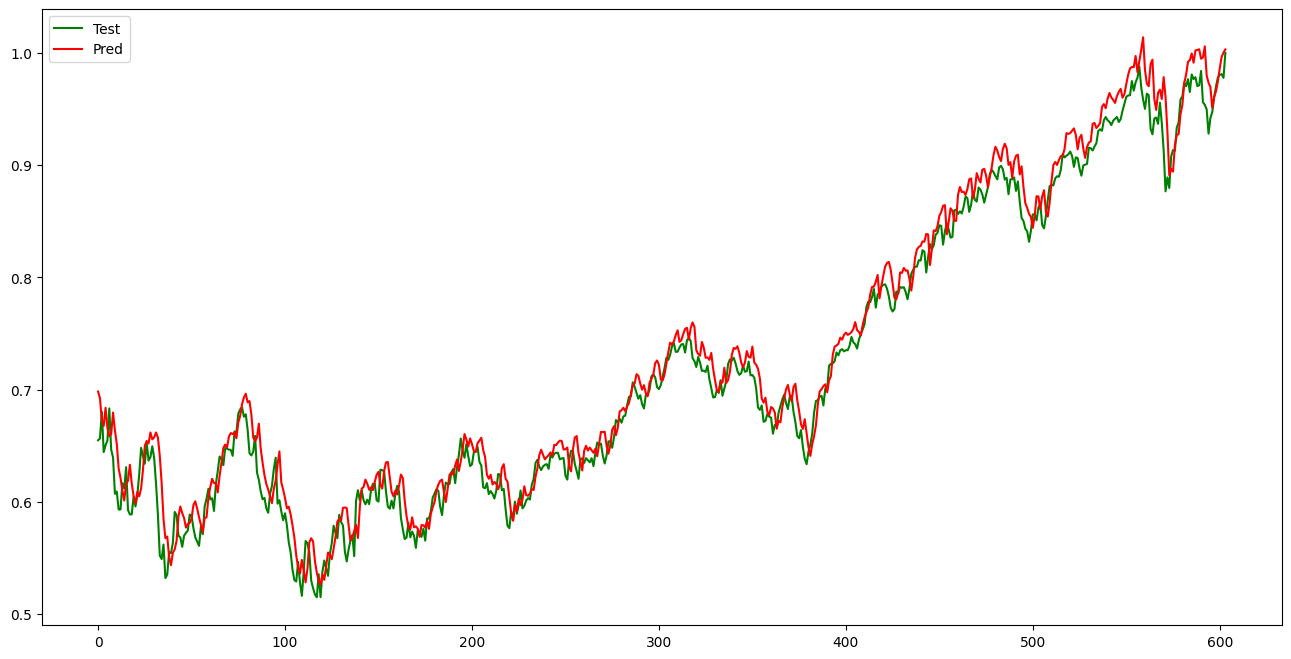

In [14]:
# Set the size of the plot
plt.figure(figsize=(16, 8))

# Plot the actual test values
plt.plot(y_test, color='green', label='Test')  # Actual test values in green

# Plot the predicted values
plt.plot(y_pred, color='red', label='Pred')  # Predicted values in red

# Add a legend to differentiate between actual and predicted values
plt.legend()

# Display the plot
plt.show()
